In [141]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [143]:
#pandas option
pd.set_option('display.float_format',lambda x: '%4f'% x)

**model building in tensorflow**

In [144]:
# load tensorflow
import tensorflow as tf
mnist=tf.keras.datasets.mnist

# fix random seed for reproducibility
np.random.seed(5)
(x_train,y_train),(x_test,y_test) = mnist.load_data()



In [145]:
print(type(x_train))

<class 'numpy.ndarray'>


In [146]:
x_train.shape

(60000, 28, 28)

In [147]:
# create a validation data set for full training  data
# scale the data b/w 0 and 1 by dividing 255
x_val,x_trian = x_train[:5000]/255., x_train[5000:]/255
y_val,y_trian = y_train[:5000] , y_train[5000:]

#scale the test set as well

x_test = x_test/255.

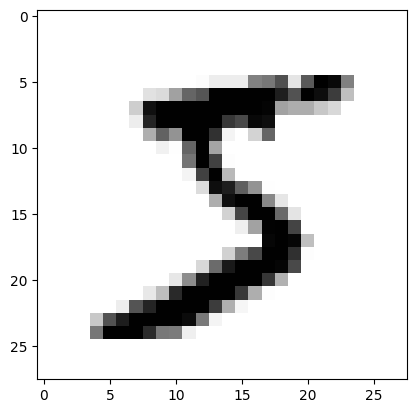

In [148]:
#let the veiw the first data point if x_ train
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap="binary")
plt.show()

<Axes: >

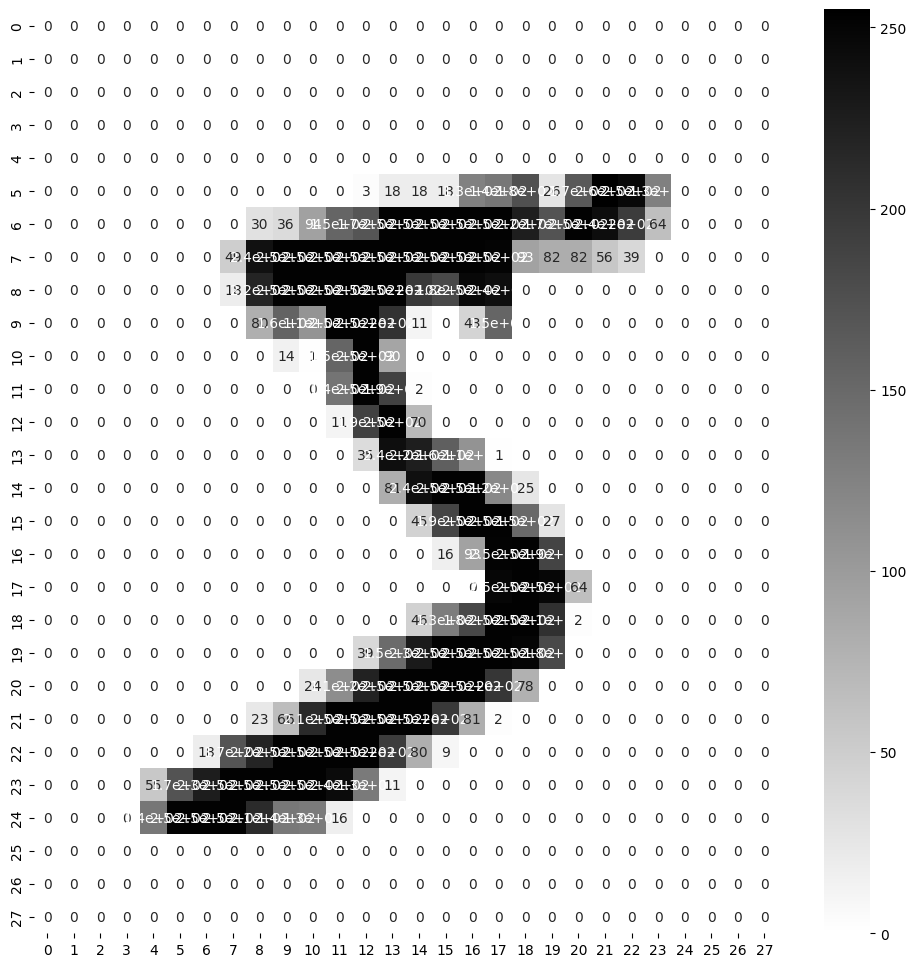

In [149]:
plt.figure(figsize=(12,12))
sns.heatmap(x_train[0],annot=True,cmap="binary")

In [150]:
y_train[0]

5

In [151]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

**define keras model**

In [154]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation="tanh"))

model.add(tf.keras.layers.Dense(100,activation="tanh"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))



In [155]:
model.layers

In [156]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 300)               235500    
                                                                 
 dense_15 (Dense)            (None, 100)               30100     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1

True

In [158]:
hidden1.get_weights()

[array([[ 0.02784441,  0.00926547,  0.01146793, ..., -0.02964499,
          0.03905084,  0.06705436],
        [-0.02848257,  0.0254219 ,  0.04242132, ...,  0.04483124,
          0.03530274, -0.04739437],
        [ 0.06684455,  0.06015497, -0.06589375, ..., -0.0141552 ,
         -0.01533262,  0.04321326],
        ...,
        [ 0.05688652,  0.06946109,  0.05004329, ...,  0.05250776,
         -0.03183232,  0.05138235],
        [-0.06457315,  0.07181254,  0.03630178, ..., -0.01564069,
          0.00825894, -0.03202364],
        [ 0.00846376,  0.06023484,  0.0060434 , ...,  0.02054334,
         -0.01353301,  0.02081163]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [159]:
weights,biases = hidden1.get_weights()

In [160]:
print('shape\n',weights.shape,"\n")
weights

shape
 (784, 300) 



array([[ 0.02784441,  0.00926547,  0.01146793, ..., -0.02964499,
         0.03905084,  0.06705436],
       [-0.02848257,  0.0254219 ,  0.04242132, ...,  0.04483124,
         0.03530274, -0.04739437],
       [ 0.06684455,  0.06015497, -0.06589375, ..., -0.0141552 ,
        -0.01533262,  0.04321326],
       ...,
       [ 0.05688652,  0.06946109,  0.05004329, ...,  0.05250776,
        -0.03183232,  0.05138235],
       [-0.06457315,  0.07181254,  0.03630178, ..., -0.01564069,
         0.00825894, -0.03202364],
       [ 0.00846376,  0.06023484,  0.0060434 , ...,  0.02054334,
        -0.01353301,  0.02081163]], dtype=float32)

In [161]:
print(biases.shape)
biases

(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**compile keras model**

In [162]:
%%time
loss_function = "sparse_categorical_crossentropy"
optimizer ="adam"
metrics = ["accuracy"]
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=metrics)

CPU times: user 15.5 ms, sys: 0 ns, total: 15.5 ms
Wall time: 16.2 ms


In [163]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(60000, 28, 28)
(60000,)
(5000, 28, 28)
(5000,)


**fit keras model**

In [164]:
%%time
val_set = (x_val,y_val)
history = model.fit(x_train,y_train,
                    epochs=10,
                    validation_data = val_set,)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4866 - accuracy: 0.8491 - val_loss: 0.2825 - val_accuracy: 0.9170
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3697 - accuracy: 0.8820 - val_loss: 0.2440 - val_accuracy: 0.9274
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3220 - accuracy: 0.8984 - val_loss: 0.1956 - val_accuracy: 0.9434
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2834 - accuracy: 0.9101 - val_loss: 0.1831 - val_accuracy: 0.9504
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2818 - accuracy: 0.9112 - val_loss: 0.1758 - val_accuracy: 0.9456
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2576 - accuracy: 0.9189 - val_loss: 0.1468 - val_accuracy: 0.9572
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2461 - accuracy: 0.9221 - val_loss: 0.1614 - val_ac

In [165]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1875}

In [166]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.486627,0.849117,0.282541,0.917000
1,0.369741,0.881983,0.243989,0.927400
2,0.322036,0.898350,0.195644,0.943400
3,0.283391,0.910133,0.183131,0.950400
4,0.281761,0.911233,0.175828,0.945600
5,0.257582,0.918867,0.146781,0.957200
6,0.246127,0.922133,0.161421,0.952200
7,0.233344,0.926983,0.149844,0.956800
8,0.216451,0.933400,0.145825,0.956200
9,0.217763,0.930867,0.143324,0.955800


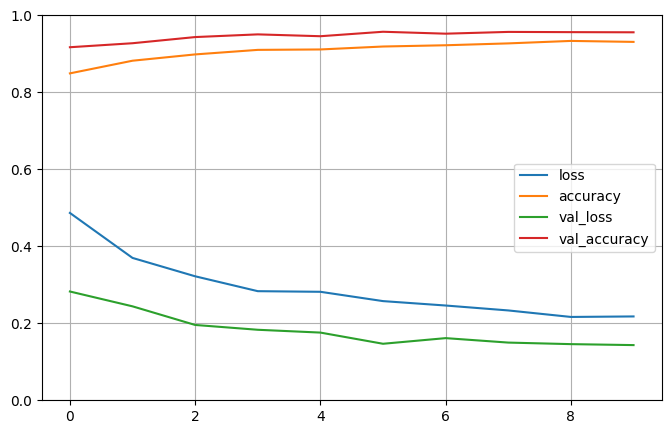

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [168]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_valid = np.argmax(model.predict(x_val),axis=-1)

print("y_valid predicted shape",y_pred_valid.shape)
print("y_validtrue shape",y_val.shape)
print(confusion_matrix(y_pred_valid,y_val))
print(classification_report(y_pred_valid,y_val))


157/157 [==============================] - 1s 4ms/step
y_valid predicted shape (5000,)
y_validtrue shape (5000,)
[[469   0   0   0   0   1   1   0   1   2]
 [  1 554   3   3   2   3   5   4  14   2]
 [  0   3 461   4   2   0   0   2   1   0]
 [  0   1   3 457   0   7   0   0   6   4]
 [  0   2   3   1 521   2   3   4   1   7]
 [  4   0   0   8   0 403   3   2   4   1]
 [  2   0   2   1   3   8 487   0   1   1]
 [  0   0   6   4   0   0   0 532   0  11]
 [  3   1   9  10   0   5   2   0 432   4]
 [  0   2   1   5   7   5   0   6   2 463]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       474
           1       0.98      0.94      0.96       591
           2       0.94      0.97      0.96       473
           3       0.93      0.96      0.94       478
           4       0.97      0.96      0.97       544
           5       0.93      0.95      0.94       425
           6       0.97      0.96      0.97       505
           7       0.97

**prediction**

In [169]:
x_new = x_test[:4]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 34ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.95, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [170]:
y_pred = np.argmax(model.predict(x_new),axis =-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([7, 2, 1, 0])

In [171]:
y_test_new = y_test[:4]

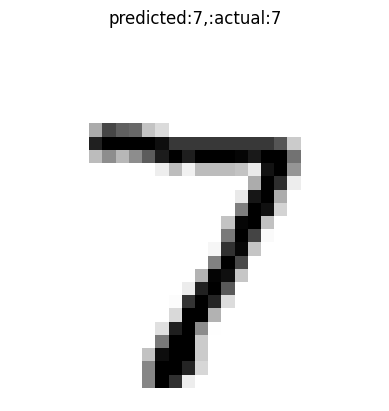

_ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _


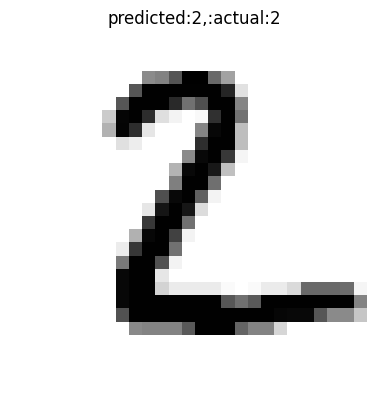

_ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _


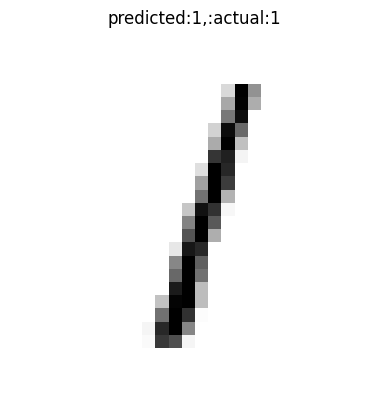

_ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _


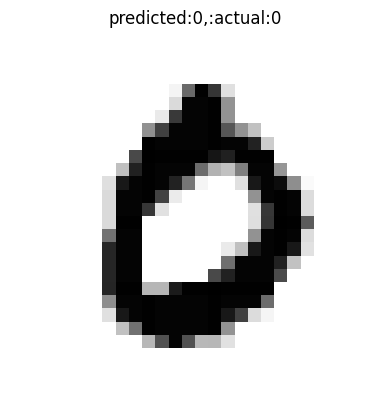

_ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _


In [172]:
for data,pred,actual in zip(x_new,y_pred,y_test_new):
   plt.imshow(data,cmap = "binary")
   plt.title(f'predicted:{pred},:actual:{actual}')
   plt.axis("off")
   plt.show()
   print("_ _ _ _"*20)